# Plotting unstructured data

In many cases the data being used is not structured enough to be described by a grid definition. This example demonstrates some earthkit tools which make it possible to effectively plot such data. Here we use some raw satellite data, which is provided as a 1-dimensional vector of points, each with a latitude and longitude value.

First we import the earthkit packages and define a Style that we will use in all the plots of this example.

In [1]:
import earthkit.data
import earthkit.plots

LEVELS = [i for i in range(390, 431, 4)]
STYLE = earthkit.plots.styles.Style(
    levels=LEVELS,
    extend="both",
    colors="Spectral_r",
)

This example use some sample test data which is a collection of satellite soundings from the IASI instrument on the METOP-C satellite from January 2021. Below we download and open the data with earthkit.

In [2]:
data = earthkit.data.from_source(
    "url",
    "https://get.ecmwf.int/repository/test-data/earthkit-plots/CO2_iasi_metop_c_nlis_2021_01.nc",
)
data_xr = data.to_xarray()
data_xr


<xarray.Dataset> Size: 11MB
Dimensions:       (sounding_dim: 381003)
Coordinates:
    latitude      (sounding_dim) float32 2MB dask.array<chunksize=(381003,), meta=np.ndarray>
    longitude     (sounding_dim) float32 2MB dask.array<chunksize=(381003,), meta=np.ndarray>
    time          (sounding_dim) datetime64[ns] 3MB dask.array<chunksize=(381003,), meta=np.ndarray>
  * sounding_dim  (sounding_dim) int64 3MB 0 1 2 3 ... 381000 381001 381002
Data variables:
    co2           (sounding_dim) float32 2MB dask.array<chunksize=(381003,), meta=np.ndarray>
Attributes: (12/36)
    title:                     NLIS
    institution:               Laboratoire de Météorologie Dynamique (LMD) - ...
    source:                    
    history:                   
    reference:                 Crevoisier et al., ACP, 2009, 2013
    tracking_id:               0ecf28e1-68ca-4e4c-8db9-3fbc1ebdfeca
    ...                        ...
    time_coverage_resolution:  P1D
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    license:                   ESA CCI Data Policy: free and open access
    platform:                  Metop-C
    sensor:                    IASI
    spatial_resolution:

The xarray reporesentation above shows how this `co2` data is stored in a single dimension, `sounding_dim`, with the `latitude`, `longitude` and `time` coordinates also stored along this dimensions.

First we will plot this data as a scatter plot, this gives a good feel for the data, however, it does not handle the overlapping points well.

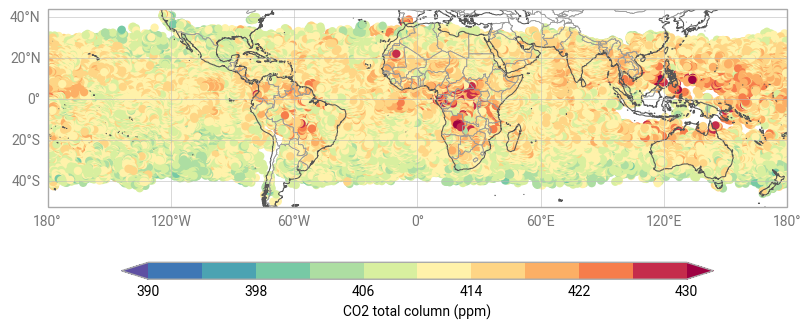

In [3]:
chart = earthkit.plots.Map()

chart.scatter(
    z = data_xr.co2.values,
    x = data_xr.longitude.values,
    y = data_xr.latitude.values,
    style=STYLE,
    linewidths=0,
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.legend(label="CO2 total column (ppm)")

chart.show()

We can also contour the data. To do this, the data must be interpolated. This can by provding interpolation options via the `interpolate` kwarg. To use the default interpolation config, it is enough to set `interpolate=True`.

The default interpolation approach is to detect the resolution of the data based on the median spacing of closest point distancem and then resample on a two dimensional grid in the projection of the plot projection.

:warning: If you do not provide any explicit interpolation information, a warning is produced by `earthkit-plots` indicating that interpolation is taking place using the default options.


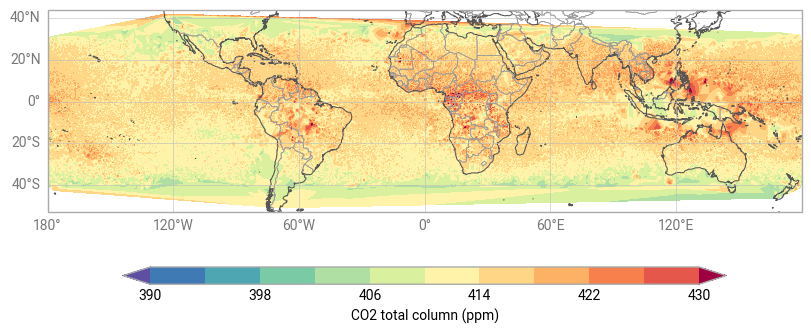

In [7]:
chart = earthkit.plots.Map()

chart.contourf(
    z = data_xr.co2.values,
    x = data_xr.longitude.values,
    y = data_xr.latitude.values,
    style=STYLE,
    interpolate=True,
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.legend(label="CO2 total column (ppm)")

chart.show()

The default interpolation option may be computationally expensive.
It is possible to speed things up by defining the interpolation options. This not only skips the resolution detection, but also allows the user to select a grid which is faster to interpolate to.

The interpolation kwarg is handled behind the scenes as a {class}` earthkit.plots.resample.Interpolate` class

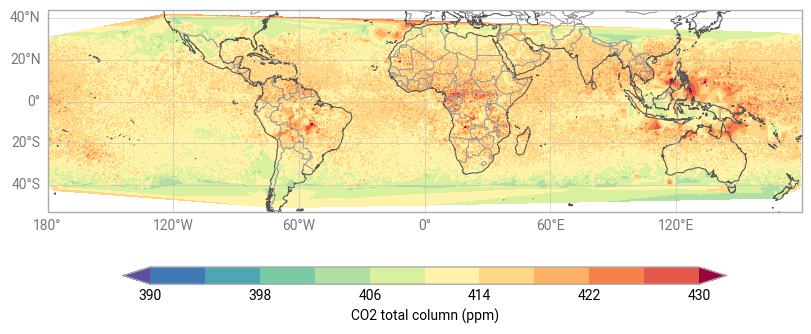

In [6]:
chart = earthkit.plots.Map()

chart.contourf(
    z = data_xr.co2.values,
    x = data_xr.longitude.values,
    y = data_xr.latitude.values,
    style=STYLE,
    interpolate=dict(target_shape=1000),
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.legend(label="CO2 total column (ppm)")

chart.show()

/Users/edwardcomyn-platt/Work/Git_Repositories/EARTHKIT/earthkit-plots/src/earthkit/plots/components/subplots.py:511: UserWarning: contourf failed with raw data, attempting interpolation to structured grid.
  warnings.warn(


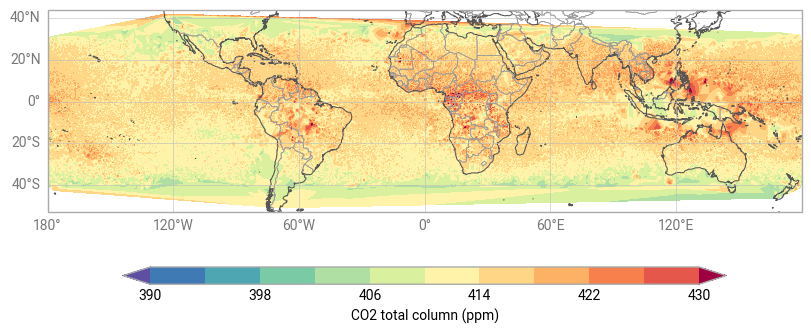

In [6]:
chart = earthkit.plots.Map()

chart.contourf(
    z = data_xr.co2.values,
    x = data_xr.longitude.values,
    y = data_xr.latitude.values,
    style=STYLE,
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.legend(label="CO2 total column (ppm)")

chart.show()

To avoid this, we can use the `interpolation_distance_threshold` kwarg.

For unstructured data, a plot cell will only be plotted if there is at least one data point within the `interpolation_distance_threshold`. This can be set to `auto` , as in the code block below, and earthkit-plots will try to determine a sensible distance based on the distribution of the data provided and the resolution of the plot produced.

It can also take numeric values which represent a distance in the spatial units of the plotting projection (e.g. degrees for `PlateCarre`), or a string of the form `"N cells"`, where `N` is the number of plotting cells that are used in the interpolation.

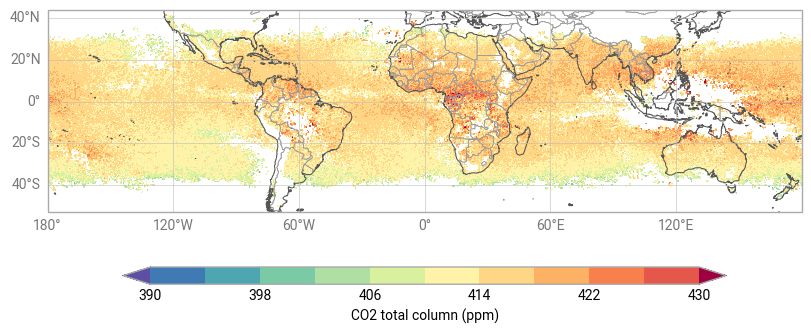

In [ ]:
chart = earthkit.plots.Map()

chart.contourf(
    z = data_xr.co2.values,
    x = data_xr.longitude.values,
    y = data_xr.latitude.values,
    style=STYLE,
    # interpolate=dict(distance_threshold="auto")
)

chart.coastlines()
chart.borders()
chart.gridlines()

chart.legend(label="CO2 total column (ppm)")

chart.show()